## Measuring Magnetic Constant Experiment - Explore
### Load Libraries

In [2]:
# For scientific computing
import numpy as np
from scipy.stats import norm
from scipy.stats import poisson
from scipy.special import factorial
from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit
from scipy.stats import chi2

# For plotting
import matplotlib.pyplot as plt

## Plot of I^2 vs (2* Pi * d *m*g / l)
Equation is written as:
$$I^2 = \frac{1}{\mu_0} (\frac{2 \pi dmg}{l})$$
where $\frac{1}{\mu_0}$ is slope m

Degrees of freedom (N-2): 1
Intercept estimate with experimental uncertainty: (9.054 ± 4.71)
Slope estimate with experimental uncertainty: (10.43 ± 2.897)

experimental uncertainty, alpha_c : 4.71
experimental uncertainty, alpha_m : 2.897 
mu0_est =  9.58494627595582e-08
actual m0 = 1.2566370614359173e-06
difference % =  92.37254210455689  %


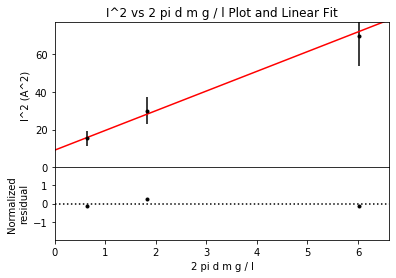

In [3]:
# --------------------------------------------------------------------------------------------------
# Read Data
# --------------------------------------------------------------------------------------------------

#global string for labelling
labely = "I^2 (A^2)"
labelx = "2 pi d m g / l"

#global constants
Dnull = 25.25 #cm
barDiam = 0.318 #cm
b = 68.0 #cm
l = 29.15 #cm
c = 20.8 # cm
g = 980.665 #cm/s^2

I, m, Dmass, D = np.genfromtxt(f"data/2020-10-27-data.csv", delimiter=',', 
                            unpack=True, skip_header=2, encoding='utf_8_sig')

Isq = I**2
#uncertainties
alpha_I = 0.02 * I + 0.05
alpha_Isq = Isq * np.sqrt(abs(2 * alpha_I / I))
alpha_m = 0.0005

d = D * c / (2 * b) + barDiam
x = 2 * np.pi * d * m * g / l

#D = Dnull - Dmass

# --------------------------------------------------------------------------------------------------
# Fitting
# --------------------------------------------------------------------------------------------------

#inputs
x = x
y = Isq

alpha_x = alpha_m
alpha_y = alpha_Isq

# Number of terms
N = len(x)

# compute c_hat, m_hat
#p, V = np.polyfit(x, y, 1, cov='True') # using common uncertainties
p, V = np.polyfit(x, y, 1, w=1/alpha_y, cov='unscaled') # using DMM uncertainties
m_hat = p[0]
c_hat = p[1]
alpha_m_hat = np.sqrt(V[0][0])
alpha_c_hat = np.sqrt(V[1][1])
alpha_CU = np.sqrt((1/(N-2)) * np.sum( (y - (m_hat*x + c_hat) )**2 ))

# --------------------------------------------------------------------------------------------------
# Residual analysis
# --------------------------------------------------------------------------------------------------

# Make a grid with 2 rows, 1 colum, a 3:1 height ratio, and no 
# height space between the rows
gs = GridSpec(2, 1, height_ratios=[4, 2], hspace=0)

# Create figure
fig = plt.figure()
x_range = [0, np.max(x) * 1.1]

# Compute the measurement residuals
residuals = y - (m_hat*x + c_hat)

# Compute the model curve
x_model = np.linspace(x_range[0], x_range[1])
y_model = m_hat*x_model + c_hat

# Make the main plot
ax_main = fig.add_subplot(gs[0])

# Plot data as black dots
plt.errorbar(x, y,xerr=alpha_x, yerr=alpha_y, fmt='k.')

# Plot fit as a red line
plt.plot(x_model, y_model, 'r-')

# Format top panel: set axis ranges and add y-axis label
# No x-axis label here to avoid overlap with residual plot
plt.xlim(x_range[0], x_range[1])
plt.ylim(0, np.max(y) * 1.1)
plt.ylabel(f"{labely}")
plt.title(f"I^2 vs 2 pi d m g / l Plot and Linear Fit")


# Hide x-tick labels to avoid overlap with residual plot
ax_main.set_xticklabels([])

# Make the residual plot with a dotted zero line
# Need to adjust ylim,  yticks, ylabel for readability
ax_res = fig.add_subplot(gs[1])

# Plot residuals as black dots
plt.plot(x, residuals/alpha_y,'k.')

# Show zero line as a black dotted line
plt.plot(x_range, [0,0], 'k:') #plt.plot([xmin,xmax],[ymin,ymax]) format

# Format bottom panel: set axis ranges, explicitly set
# y-tick values to avoid overlap with top panel, and
# add labels to x-axis and y-axis
plt.xlim(x_range[0], x_range[1])
plt.ylim(-2, 2)
plt.yticks([-1, 0, 1])
plt.xlabel(f"{labelx}")
plt.ylabel("Normalized\nresidual")


#Printing Results
# Show optimized fit parameters and uncertainties
print(f"Degrees of freedom (N-2): {N-2:d}")

# results using common uncertainties
print(f"Intercept estimate with experimental uncertainty: ({c_hat:.3f} ± {alpha_c_hat:.2f})")
print(f"Slope estimate with experimental uncertainty: ({m_hat:.2f} ± {alpha_m_hat:.3f})")
print()
print(f"experimental uncertainty, alpha_c : {alpha_c_hat:.2f}")
print(f"experimental uncertainty, alpha_m : {alpha_m_hat:.3f} ")

mu0_est = 1/(m_hat) * 10 ** (-6) # H/m
print("mu0_est = ", mu0_est)
mu0_actual = 4 * np.pi * 10 ** (-7) # H/m
print("actual m0 =", mu0_actual)

# differecne
print("difference % = ", abs((mu0_est - mu0_actual)/mu0_actual) * 100, " %")

# Show plot
plt.show();

## Plot of I^2 vs m

Degrees of freedom (N-2): 1
Intercept estimate with experimental uncertainty: (5.404 ± 5.45)
Slope estimate with experimental uncertainty: (1213.48 ± 335.863)

experimental uncertainty, alpha_c : 5.45
experimental uncertainty, alpha_m : 335.863 


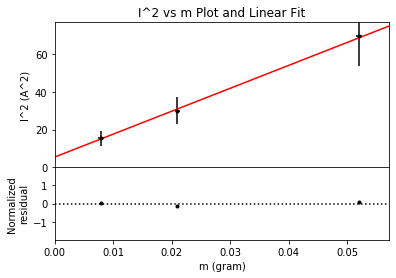

In [4]:
# --------------------------------------------------------------------------------------------------
# Read Data
# --------------------------------------------------------------------------------------------------

#global string for labelling
labely = "I^2 (A^2)"
labelx = "m (gram)"

#global constants
Dnull = 25.25 #cm
barDiam = 0.318 #cm
b = 68.0 #cm
l = 29.15 #cm
c = 20.8 # cm
g = 980.665 #cm/s^2

I, m, Dmass, D = np.genfromtxt(f"data/2020-10-27-data.csv", delimiter=',', 
                            unpack=True, skip_header=2, encoding='utf_8_sig')

Isq = I**2
#uncertainties
alpha_I = 0.02 * I + 0.05
alpha_Isq = Isq * np.sqrt(abs(2 * alpha_I / I))
alpha_m = 0.0005

#D = Dnull - Dmass

# --------------------------------------------------------------------------------------------------
# Fitting
# --------------------------------------------------------------------------------------------------

#inputs
x = m
y = Isq

alpha_x = alpha_m
alpha_y = alpha_Isq

# Number of terms
N = len(x)

# compute c_hat, m_hat
#p, V = np.polyfit(x, y, 1, cov='True') # using common uncertainties
p, V = np.polyfit(x, y, 1, w=1/alpha_y, cov='unscaled') # using DMM uncertainties
m_hat = p[0]
c_hat = p[1]
alpha_m_hat = np.sqrt(V[0][0])
alpha_c_hat = np.sqrt(V[1][1])
alpha_CU = np.sqrt((1/(N-2)) * np.sum( (y - (m_hat*x + c_hat) )**2 ))

# --------------------------------------------------------------------------------------------------
# Residual analysis
# --------------------------------------------------------------------------------------------------

# Make a grid with 2 rows, 1 colum, a 3:1 height ratio, and no 
# height space between the rows
gs = GridSpec(2, 1, height_ratios=[4, 2], hspace=0)

# Create figure
fig = plt.figure()
x_range = [0, np.max(x) * 1.1]

# Compute the measurement residuals
residuals = y - (m_hat*x + c_hat)

# Compute the model curve
x_model = np.linspace(x_range[0], x_range[1])
y_model = m_hat*x_model + c_hat

# Make the main plot
ax_main = fig.add_subplot(gs[0])

# Plot data as black dots
plt.errorbar(x, y,xerr=alpha_x, yerr=alpha_y, fmt='k.')

# Plot fit as a red line
plt.plot(x_model, y_model, 'r-')

# Format top panel: set axis ranges and add y-axis label
# No x-axis label here to avoid overlap with residual plot
plt.xlim(x_range[0], x_range[1])
plt.ylim(0, np.max(y) * 1.1)
plt.ylabel(f"{labely}")
plt.title(f"I^2 vs m Plot and Linear Fit")


# Hide x-tick labels to avoid overlap with residual plot
ax_main.set_xticklabels([])

# Make the residual plot with a dotted zero line
# Need to adjust ylim,  yticks, ylabel for readability
ax_res = fig.add_subplot(gs[1])

# Plot residuals as black dots
plt.plot(x, residuals/alpha_y,'k.')

# Show zero line as a black dotted line
plt.plot(x_range, [0,0], 'k:') #plt.plot([xmin,xmax],[ymin,ymax]) format

# Format bottom panel: set axis ranges, explicitly set
# y-tick values to avoid overlap with top panel, and
# add labels to x-axis and y-axis
plt.xlim(x_range[0], x_range[1])
plt.ylim(-2, 2)
plt.yticks([-1, 0, 1])
plt.xlabel(f"{labelx}")
plt.ylabel("Normalized\nresidual")


#Printing Results
# Show optimized fit parameters and uncertainties
print(f"Degrees of freedom (N-2): {N-2:d}")

# results using common uncertainties
print(f"Intercept estimate with experimental uncertainty: ({c_hat:.3f} ± {alpha_c_hat:.2f})")
print(f"Slope estimate with experimental uncertainty: ({m_hat:.2f} ± {alpha_m_hat:.3f})")
print()
print(f"experimental uncertainty, alpha_c : {alpha_c_hat:.2f}")
print(f"experimental uncertainty, alpha_m : {alpha_m_hat:.3f} ")

# Show plot
plt.show();

## Post-analysis code for Plot of I^2 vs (2* Pi * d *m*g / l) using curve-fit and chi-square analysis

m = (10.34 ± 1.66)
b = (9.20 ± 3.03)
mu0 = 9.67e-08 H/m


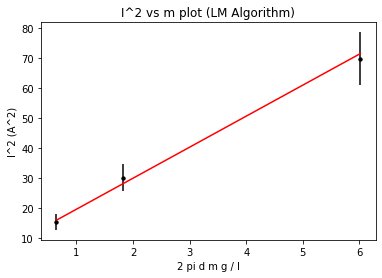

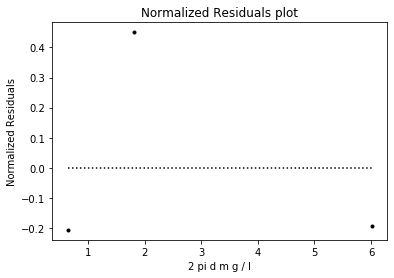

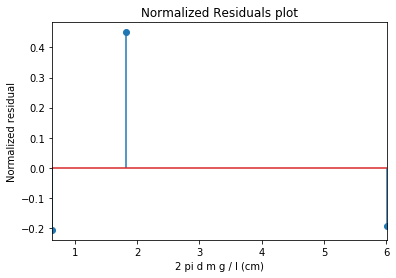

degree of freedom dof = 1
chisq_min = 0.3
Cumulative probability = 0.405453
Significance: 0.594547
chisq_min is within the range of [v-sqrt(2v), v+sqrt(2v)] = [-0.41421356237309515, 2.414213562373095], so our model is within the 1*sigma range
Our model is accepted


In [7]:
# --------------------------------------------------------------------------------------------------
# Read Data
# --------------------------------------------------------------------------------------------------

#global string for labelling
labely = "I^2 (A^2)"
labelx = "2 pi d m g / l"

#global constants
Dnull = 25.25 #cm
barDiam = 0.318 #cm
b = 68.0 #cm
l = 29.15 #cm
c = 20.8 # cm
g = 980.665 #cm/s^2

I, m, Dmass, D = np.genfromtxt(f"data/2020-10-27-data.csv", delimiter=',', 
                            unpack=True, skip_header=2, encoding='utf_8_sig')

Isq = I**2
#uncertainties
alpha_I = 0.002 * I + 0.05
alpha_Isq = Isq * np.sqrt(abs(2 * alpha_I / I))
alpha_m = 0.0005

d = D * c / (2 * b) + barDiam
x = 2 * np.pi * d * m * g / l

#number of parameters
n = 2

# --------------------------------------------------------------------------------------------------
# Fitting
# --------------------------------------------------------------------------------------------------

#inputs
x = x
y = Isq
alpha_x = 0
alpha_y = alpha_Isq
N = len(x)

def myFunc(x, m, b):
    return m * x + b

pOpt, pCov = curve_fit(myFunc, x, y,
                       p0=[1, 0],
                       sigma=alpha_y,
                       absolute_sigma=True) # abs sigma set to true if y error is known with the samee unit

# Assign each element of pOpt to a named variable
p0_opt = pOpt[0]
p1_opt = pOpt[1]

# Compute the standard errors for the parameters
# by taking the square root of the diagonal elements of pCov
alpha_vec = np.sqrt(np.diag(pCov))

# Assign each element of alpha_vec to a named variable
alpha_p0 = alpha_vec[0]
alpha_p1 = alpha_vec[1]

# printing/plotting result ------------------------------------------

# Show optimized fit parameters and uncertainties
print(f"m = ({p0_opt:.2f} ± {alpha_p0:.2f})")
print(f"b = ({p1_opt:.2f} ± {alpha_p1:.2f})")

mu0 = 1 / p0_opt * (10 ** (-6))
print(f"mu0 = {mu0:.3} H/m")


# Plot data
plt.plot(x, y, 'k.')
plt.plot(x, myFunc(x, p0_opt, p1_opt), 'r-')
plt.errorbar(x, y, yerr=alpha_y, fmt='k.')
plt.xlabel(f'{labelx}')
plt.ylabel(f'{labely}')
plt.title(f'I^2 vs m plot (LM Algorithm)')
plt.show()

# Plot the residuals in a separate figure
plt.plot(x, (y - myFunc(x, p0_opt, p1_opt))/alpha_y, 'k.')
plt.plot([np.min(x), np.max(x)], [0,0], 'k:') #plt.plot([xmin,xmax],[ymin,ymax]) format
plt.xlabel(f"{labelx}")
plt.ylabel('Normalized Residuals')
plt.title(f'Normalized Residuals plot')
plt.show()

# --------------------------------------------------------------------------------------------------
# Chi-square analysis
# --------------------------------------------------------------------------------------------------
# Compute and display chi-squared minimum
dof = len(x) - n
res = y - myFunc(x, p0_opt, p1_opt)
normres = res/alpha_y
chisq = np.sum(normres**2)

# Compute the probability of getting this fit result
cdf = chi2.cdf(chisq, dof)

# plotting result
plt.stem(x, normres, use_line_collection=True)
plt.xlabel(f'{labelx} (cm)')
plt.ylabel('Normalized residual')
plt.title(f'Normalized Residuals plot')
plt.xlim(np.min(x), np.max(x))
plt.show()

# printing result -------------------------------------------------------------------------
print(f"degree of freedom dof = {dof}")
print(f"chisq_min = {chisq:.1f}")
print(f"Cumulative probability = {cdf:.6f}")
print(f"Significance: {1-cdf:.6f}")

if (chisq > dof - np.sqrt(2 * dof) and chisq < dof + np.sqrt(2 * dof)):
    print(f"chisq_min is within the range of [v-sqrt(2v), v+sqrt(2v)] = [{dof - np.sqrt(2 * dof)}, {dof + np.sqrt(2 * dof)}], so our model is within the 1*sigma range")
    print("Our model is accepted")
else:
    print(f"null hypothesis is rejected; our model is not accepted.")